In [1]:
import pandas as pd
from matplotlib.pyplot import colorbar

EDA2024 = pd.read_csv('../data/processed/spotify_global_chart_2024_cleaned.csv', sep=',', na_values=[''], quotechar='"')
EDA2024.head()

,vi_tri_xep_hang,nghe_si,ten_bai_hat,vi_tri_cao_nhat,vi_tri_tuan_truoc,so_tuan_tren_bang_xep_hang,luot_nghe,bai_hat_moi,thay_doi_thu_hang,nhom_luot_nghe,do_ben
0,1,Tate McRae,greedy,1,14,16,33855816,False,13,Rất cao,Dài hạn
1,2,Xavi,La Diabla,2,17,4,30894083,False,15,Rất cao,Ngắn hạn
2,3,Jack Harlow,Lovin On Me,3,19,8,30778444,False,16,Rất cao,Trung hạn
3,4,Taylor Swift,Cruel Summer,2,20,48,30224692,False,16,Rất cao,Dài hạn
4,5,Mitski,My Love Mine All Mine,3,18,15,26430016,False,13,Rất cao,Dài hạn


In [2]:
EDA2024.shape
EDA2024.describe()

,vi_tri_xep_hang,vi_tri_cao_nhat,vi_tri_tuan_truoc,so_tuan_tren_bang_xep_hang,luot_nghe,thay_doi_thu_hang
count,10600.000000,10600.000000,10600.000000,10600.000000,1.060000e+04,10600.000000
mean,100.500000,41.451604,82.942925,55.432736,1.419974e+07,-17.557075
std,57.737029,46.509372,59.791783,69.761415,8.556465e+06,52.395170
min,1.000000,1.000000,-1.000000,1.000000,7.711230e+06,-201.000000
25%,50.750000,6.000000,29.000000,8.000000,9.671205e+06,-20.000000
50%,100.500000,21.000000,81.000000,28.000000,1.125754e+07,-4.000000
75%,150.250000,65.000000,133.000000,78.000000,1.505900e+07,4.000000
max,200.000000,200.000000,200.000000,404.000000,1.028784e+08,175.000000


Số lượng bài hát & nghệ sĩ duy nhất

In [4]:
so_bai_hat = EDA2024['ten_bai_hat'].nunique()
so_nghe_si = EDA2024['nghe_si'].nunique()
so_bai_hat,so_nghe_si

(951, 604)

Tổng & trung bình lượt nghe

In [8]:
EDA2024['luot_nghe'].describe()

count    1.060000e+04
mean     1.419974e+07
std      8.556465e+06
min      7.711230e+06
25%      9.671205e+06
50%      1.125754e+07
75%      1.505900e+07
max      1.028784e+08
Name: luot_nghe, dtype: float64

Tỷ lệ bài hát mới

In [9]:
EDA2024['bai_hat_moi'].value_counts(normalize=True) * 100


bai_hat_moi
False    88.792453
True     11.207547
Name: proportion, dtype: float64

Độ bề bài hát trên BXH

In [10]:
EDA2024['do_ben'].value_counts()

do_ben
Dài hạn      7124
Ngắn hạn     1769
Trung hạn    1707
Name: count, dtype: int64

EDA BƯỚC 2 – PHÂN PHỐI LƯỢT NGHE

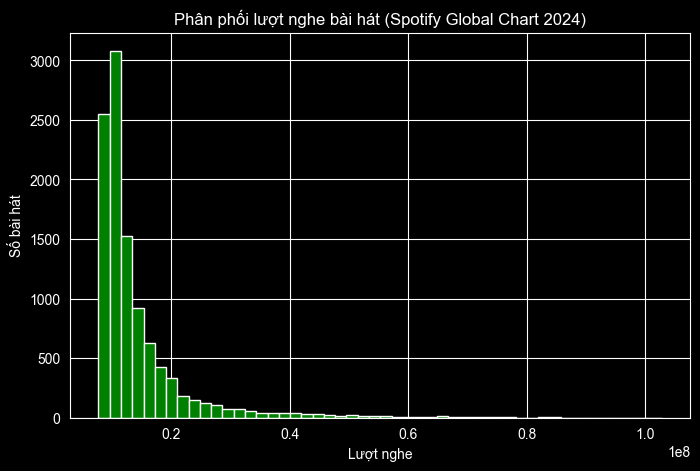

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(EDA2024['luot_nghe'], bins=50, color='green')
plt.title('Phân phối lượt nghe bài hát (Spotify Global Chart 2024)')
plt.xlabel('Lượt nghe')
plt.ylabel('Số bài hát')
plt.show()

Boxplot - Phát hiện giá trị cực trị

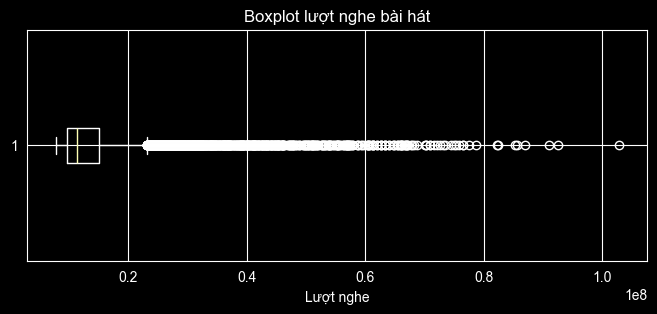

In [19]:
plt.figure(figsize=(8,3))
plt.boxplot(EDA2024['luot_nghe'], vert=False,)
plt.title('Boxplot lượt nghe bài hát')
plt.xlabel('Lượt nghe')
plt.show()

Log-scale

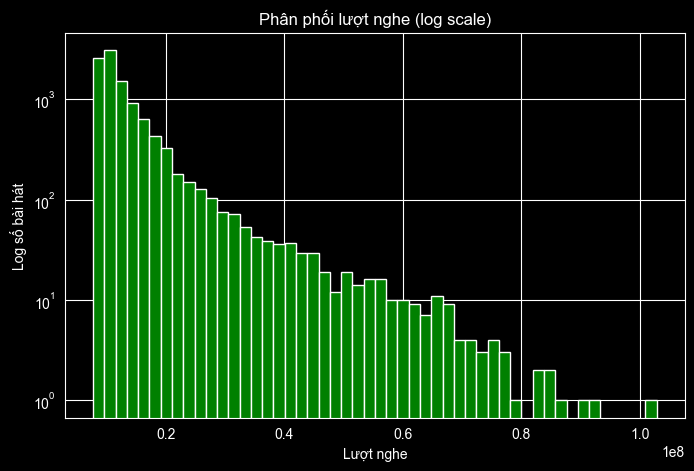

In [23]:
plt.figure(figsize=(8,5))
plt.hist(EDA2024['luot_nghe'], bins=50, log=True,color='green')
plt.title('Phân phối lượt nghe (log scale)')
plt.xlabel('Lượt nghe')
plt.ylabel('Log số bài hát')
plt.show()

So sánh lượt nghe theo nhóm (bins)

In [21]:
EDA2024['nhom_luot_nghe'].value_counts()

nhom_luot_nghe
Rất cao       2650
Cao           2650
Trung bình    2650
Thấp          2650
Name: count, dtype: int64

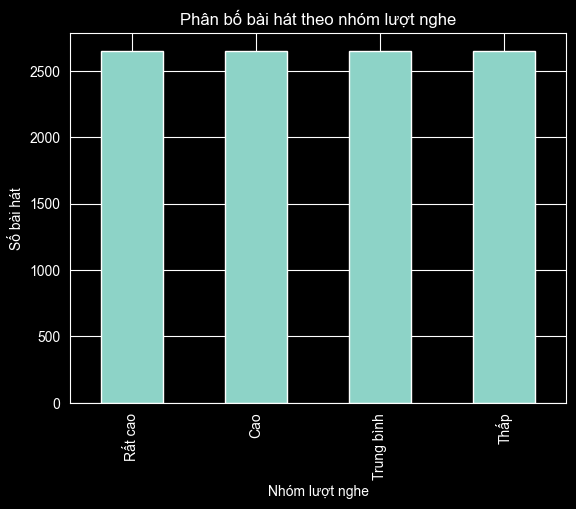

In [25]:
EDA2024['nhom_luot_nghe'].value_counts().plot(kind='bar')
plt.title('Phân bố bài hát theo nhóm lượt nghe')
plt.xlabel('Nhóm lượt nghe')
plt.ylabel('Số bài hát')
plt.show()